## Descripción de proyecto

Has recibido una tarea analítica de una tienda en línea internacional. Tus predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

## Descripción Técnica

- Nombre de la prueba: `recommender_system_test`
- Grupos: А (control), B (nuevo embudo de pago)
- Launch date: 2020-12-07
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
- Fecha de finalización: 2021-01-01
- Audiencia: 15% de los nuevos usuarios de la región de la UE
- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado
- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento `product_page`), instancias de agregar artículos al carrito de compras (`product_card`) y compras (`purchase`). En cada etapa del embudo `product_page → product_card → purchase`, habrá al menos un 10% de aumento.
- Número previsto de participantes de la prueba: 6000

Descarga los datos de la prueba, comprueba si se ha realizado correctamente y analiza los resultados.

## Descripción de los Datos

Se te propercionaron los siguentes datasets:

- `ab_project_marketing_events_us.csv`: El calendario de eventos de marketing para 2020
- `final_ab_new_users_upd_us.csv`: Todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020
- `final_ab_events_upd_us.csv`: Todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021
- `final_ab_participants_upd_us.csv`: Tabla con los datos de los participantes de la prueba.

Estructura `ab_project_marketing_events_us.csv`:

- `name`: El nombre del evento de marketing
- `regions`: Regiones donde se llevará a cabo la campaña publicitaria
- `start_dt`: Fecha de inicio de la campaña
- `finish_dt`: Fecha de finalización de la campaña


Estructura `final_ab_new_users_upd_us.csv`:

- `user_id`: ID del usuario
- `first_date`: Fecha de inscripción
- `region`: Región donde se llevo cabo la campaña
- `device`: Dispositivo utilizado para la inscripción

Estructura `final_ab_events_upd_us.csv`:

- `user_id`: ID del usuario
- `event_dt`: Fecha y hora del evento
- `event_name`: Nombre del tipo de evento
- `details`: Datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos `purchase`)

Estructura `final_ab_participants_upd_us.csv`:

- `user_id`: ID del usuario
- `ab_test`: Nombre de la prueba
- `group`: El grupo de prueba al que pertenecía el usuario

## Instrucciones para completar el proyecto

* Describe los objetivos del estudio.

- Explora los datos:
    - ¿Es necesario convertir los tipos?
    - ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?

- Lleva a cabo el análisis exploratorio de datos:
    - Estudia la conversión en las diferentes etapas del embudo.
    - ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
    - ¿Hay usuarios que están presentes en ambas muestras?
    - ¿Cómo se distribuye el número de eventos entre los días?
    - ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

- Evaluar los resultados de la prueba A/B:
    - ¿Qué puedes decir sobre los resultados de la prueba A/B?
    - Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones

* Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B

## OBJETIVOS DEL ESTUDIO DEL A/B TEST:

Analizar el lanzamiento de una nueva pagina de productos(product_page) a la que se le realizaron modificaciones con la idea de tener una mejor conversión en vistas de la página del producto. En cada etapa del embudo product_page → product_card → purchase, habrá al menos un 10% de aumento.

- OBJETIVOS DEL ANALISIS:

    - Verificar los datos de prueba del A/B test y comprobar si el test se ha hecho correctamente
    - Estudiar el embudo de eventos y analizar los resultados del experimento del A/B test

## Analisis exploratorio de datos(EDA)

### Carga de datsets e importe de librerias

In [1]:
# Importamos todas las librerias

import pandas as pd
import numpy as np
import math as mth
import datetime as dt
from matplotlib import pyplot as plt
from plotly import graph_objects as go
import seaborn as sns
from scipy import stats as st

In [5]:
# Cargamos todos los los datasets

ab_project_marketing_events_us = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQo5ygo1JA2gDqJfoysjvOPvu2Y9gDZuUytT9A0z7tPLfIRGlI8nRAerpYTK4ffbfW2VOHbYFIeXqEV/pub?gid=64307653&single=true&output=csv"
final_ab_new_users_upd_us = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRnMGCjt2mNpM7svTEeJ91roNYlg05jRAOTlz44mabhNMdKE1rsGNsJTbqE3tOZ8JuUv6QVKHDFSoEV/pub?gid=2047897573&single=true&output=csv"
final_ab_events_upd_us = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQUzRjM4Ywstwex6P8l3I-Ry7kQlca0jvSZZ2640iyVlvGHVjpusAE9al4OFZZqHn_B5NXpSK0NkvY1/pub?gid=771881902&single=true&output=csv"
final_ab_participants_upd_us = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTD_Fcbuh7edqEEbyhjDYCtCJgEzkE3PSgmzGQfAQsxF1a2c1ETQ8fx9xkBMr5s6P7Sx2rMpNT-pauK/pub?gid=2042992176&single=true&output=csv"

m_events = pd.read_csv(ab_project_marketing_events_us)
new_users = pd.read_csv(final_ab_new_users_upd_us)
users_event = pd.read_csv(final_ab_events_upd_us)
participants = pd.read_csv(final_ab_participants_upd_us)

In [6]:
# Lectura de datasets

print(m_events.head())
m_events.info()


                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


In [7]:
print(new_users.head())
new_users.info()

            user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [8]:
print(users_event.head())
users_event.info()

            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504   2020-12-07 9:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457   2020-12-07 4:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [9]:
print(participants.head())
participants.info()

            user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  4FF2998A348C484F     A  recommender_system_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


**OBSERVACIONES: Por ahora, podemos notar que tenemos que convertir las columnas con fechas al tipo de datos `datetime`. Tenemos presencia de valores ausentes en algunos datasets. Mas adelante haremos el tratamiento o reemplazo de esos valores. Tambien se puede notar que no es necesario renombrar los nombres de las columnas.**

In [10]:
# Pasamos las columnas con fechas al tipo de datos datetime

m_events["start_dt"] = m_events["start_dt"].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
m_events["finish_dt"] = m_events["finish_dt"].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
new_users["first_date"] = new_users["first_date"].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
users_event["event_dt"] = users_event["event_dt"].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [11]:
# Verificamos los cambios mostrando los datasets con el metodo info()

m_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 580.0+ bytes


In [12]:
# Verificamos los cambios mostrando los datasets con el metodo info()

new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [13]:
users_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [14]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [15]:
# Usamos describe() en la columnas con fechas y numericas

print(m_events["start_dt"].describe())
print(m_events["finish_dt"].describe())

count                               14
mean     2020-07-02 06:51:25.714285824
min                2020-01-25 00:00:00
25%                2020-03-23 12:00:00
50%                2020-06-01 12:00:00
75%                2020-10-31 18:00:00
max                2020-12-30 00:00:00
Name: start_dt, dtype: object
count                               14
mean     2020-07-07 10:17:08.571428608
min                2020-02-07 00:00:00
25%                2020-03-26 18:00:00
50%                2020-06-05 12:00:00
75%                2020-11-03 00:00:00
max                2021-01-07 00:00:00
Name: finish_dt, dtype: object


In [16]:
print(new_users["first_date"].describe())

count                            58703
mean     2020-12-15 01:59:36.573599488
min                2020-12-07 00:00:00
25%                2020-12-11 00:00:00
50%                2020-12-15 00:00:00
75%                2020-12-20 00:00:00
max                2020-12-23 00:00:00
Name: first_date, dtype: object


In [17]:
print(users_event["event_dt"].describe())
print(users_event["details"].describe())

count                           423761
mean     2020-12-18 10:10:17.282395648
min                2020-12-07 00:00:33
25%                2020-12-14 03:05:18
50%                2020-12-18 17:40:52
75%                2020-12-22 13:51:17
max                2020-12-30 23:36:33
Name: event_dt, dtype: object
count    60314.000000
mean        23.881219
std         72.228884
min          4.990000
25%          4.990000
50%          4.990000
75%          9.990000
max        499.990000
Name: details, dtype: float64


**OBSERVACIONES: El rango de fechas de los datos del A/B test van desde el 7 de Diciembre del 2020 hasta el 30 de Diciembre del mismo mes. El A/B test abarca datos de menos de 1 mes de duracion del test.**

### Verificacion de valores duplicados

In [18]:
# Verificamos los valores duplicados en todos los datasets

print(m_events.duplicated().sum())
print(new_users.duplicated().sum())
print(users_event.duplicated().sum())
print(participants.duplicated().sum())

0
0
0
0


**OBSERVACIONES: No tenemos presencia de valores duplicados en los diferentes datasets**

### Verificacion y tratamiento de valores ausentes

In [19]:
# Verificacamos valores ausentes

print(m_events.isna().sum())

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64


In [20]:
print(new_users.isna().sum())

user_id       0
first_date    0
region        0
device        0
dtype: int64


In [21]:
print(users_event.isna().sum())

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64


In [22]:
print(participants.isna().sum())

user_id    0
group      0
ab_test    0
dtype: int64


**OBSERVACIONES: Tenemos valores ausentes en el dataframe users_event en la columna "details". El resto de los datasets no presenta valores ausentes en la diferentes columnas**

In [23]:
# Usamos value_counts(dropna=False) en la columna "details" con valores ausentes

users_event["details"].value_counts(dropna=False)

details
NaN       363447
4.99       44579
9.99        9158
99.99       5405
499.99      1172
Name: count, dtype: int64

In [24]:
# Aplicamos el mimso proceso en la columna "event_name"


users_event["event_name"].value_counts(dropna=False)

event_name
login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: count, dtype: int64

In [25]:
# Revisamos valores ausentes por evento

users_event[users_event["details"].isna()]["event_name"].value_counts()

event_name
login           182465
product_page    120862
product_cart     60120
Name: count, dtype: int64

In [26]:
# Calculamos porcentaje de valores ausentes en las columnas

(users_event.isna().sum()/users_event.shape[0])*100

user_id        0.000000
event_dt       0.000000
event_name     0.000000
details       85.766977
dtype: float64

In [27]:
# Calculamos el porcentaje de valores ausentes por eventos

(users_event[users_event["details"].isna()]["event_name"].value_counts(1))*100

event_name
login           50.204019
product_page    33.254367
product_cart    16.541614
Name: proportion, dtype: float64

In [28]:
users_event["details"].describe()

count    60314.000000
mean        23.881219
std         72.228884
min          4.990000
25%          4.990000
50%          4.990000
75%          9.990000
max        499.990000
Name: details, dtype: float64

In [29]:
# Revisamos si existen valores ausentes en la columna "details" para el evento purchase de la columna "event_name"

users_event[users_event["event_name"]=="purchase"]["details"].isna().sum()

0

**OBSERVACIONES: Aprox el 50% de los valores ausentes de la columna "datails" pertenecen al evento login. Lo demas eventos representan menos del 50% del total de los valores ausuentes presentes en esa columna. En este caso, como mas del 80% de los valores de la columna "details" son ausentes. En este caso, no hay valores ausentes para todos los eventos purchase de la columna "event_name" por lo tanto no es necesario reemplazar o eliminar filas y columnas en nustro dataset. No es necesario reemplazar valores ausentes o eliminar filas o columnas en nustro dataset.**

### Eliminacion de usuarios presentes en ambos grupos

In [30]:
print(participants.head())
participants.shape

            user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  4FF2998A348C484F     A  recommender_system_test


(14525, 3)

In [31]:
# Verificamos el numero de usuario unicos por grupo para el A/B test
# Filtramos nuestro dataset para tomar solo los registros del A/B test llamando "recommender_system_test"

participants_test = participants[participants["ab_test"]=="recommender_system_test"]
participants_test.groupby("group", as_index=False)["user_id"].nunique()

,group,user_id
0,A,2747
1,B,928


**OBSERVACIONES: En el grupo A de control tenemos 2747 usuarios y en el grupo B tenemos 928 usuarios. La diferencia entre ambos grupos es notable por lo que los grupos no son equitativos.**

In [32]:
# Guardamos todos los user_id del grupo A en una variable

idsgroupA= participants_test[participants_test["group"]=="A"]["user_id"].unique()

# Filtramos nuestro dataset y mostramos filas y columnas

mask = (participants_test["user_id"].isin(idsgroupA)) & (participants_test["group"]=="B")

print(participants_test[mask])
print(participants_test[mask].shape)

Empty DataFrame
Columns: [user_id, group, ab_test]
Index: []
(0, 3)


**OBSERVACIONES: En este caso, se puede apreciar que no tenemos usuarios repetidos en el grupo B tambien presentes en el grupo A. No es necesario, eliminar registros**

### Estudio y comprobacion de datos del A/B test

In [33]:
users_event.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [34]:
participants_test.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [35]:
# Unimos los datasets users_event con participants usando merge()

funnel = users_event.merge(participants_test, on="user_id")
funnel.head()

,user_id,event_dt,event_name,details,group,ab_test
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test
1,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test
2,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,B,recommender_system_test
3,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,A,recommender_system_test
4,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,B,recommender_system_test


In [36]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23909 entries, 0 to 23908
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     23909 non-null  object        
 1   event_dt    23909 non-null  datetime64[ns]
 2   event_name  23909 non-null  object        
 3   details     3210 non-null   float64       
 4   group       23909 non-null  object        
 5   ab_test     23909 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.1+ MB


In [37]:
# Mostramos el numero de usuarios unicos por grupo del A/B test

funnel.groupby("group")["user_id"].nunique()

group
A    2747
B     928
Name: user_id, dtype: int64

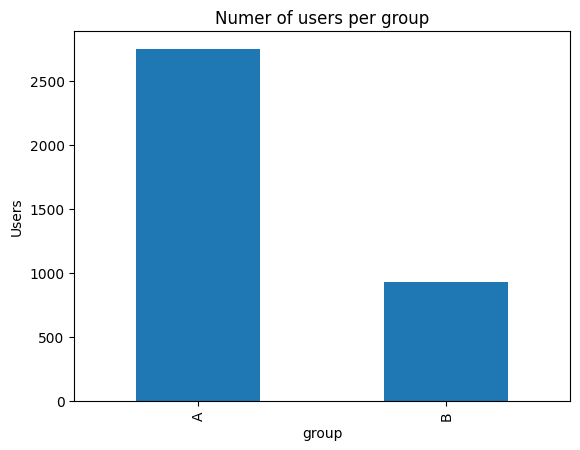

In [38]:
# Diagrama de barras del numero de usuarios unicos por grupo

funnel.groupby("group")["user_id"].nunique().plot(kind="bar")
plt.ylabel("Users")
plt.title("Numer of users per group")
plt.show()

In [39]:
# Mostramos las metricas del embudo de eventos


print(f"Numero de eventos totales: {len(funnel)}")
print()
print(f"Numero de eventos por tipo de eventos: {funnel.groupby('event_name')['user_id'].count()}")
print()
print(f"Numero de usuarios unicos: {funnel['user_id'].nunique()}")
print()
print(f"Promedio de eventos por usuario: {round(len(funnel)/funnel['user_id'].nunique(), 2)}")

Numero de eventos totales: 23909

Numero de eventos por tipo de eventos: event_name
login           10837
product_cart     3160
product_page     6702
purchase         3210
Name: user_id, dtype: int64

Numero de usuarios unicos: 3675

Promedio de eventos por usuario: 6.51


**OBSERVACIONES: Tenemos 3675 usuarios unicos en el A/B test, teniendo en cuenta las descripciones tecnicas podemos notar que es un numero demsiado bajo ya por lo menos deberiamos tener un numero previso de participantes de 6000. El promedio de eventos por usuario es 6.51 que tambien es una cifra baja.**

In [40]:
# Veamos que periodo de tiempo cubren los datos

print(f"Fecha minima: {funnel['event_dt'].min()}")
print(f"Fecha maxima: {funnel['event_dt'].max()}")

Fecha minima: 2020-12-07 00:05:57
Fecha maxima: 2020-12-30 12:42:57


Text(0.5, 1.0, 'Numero de registros por fechas')

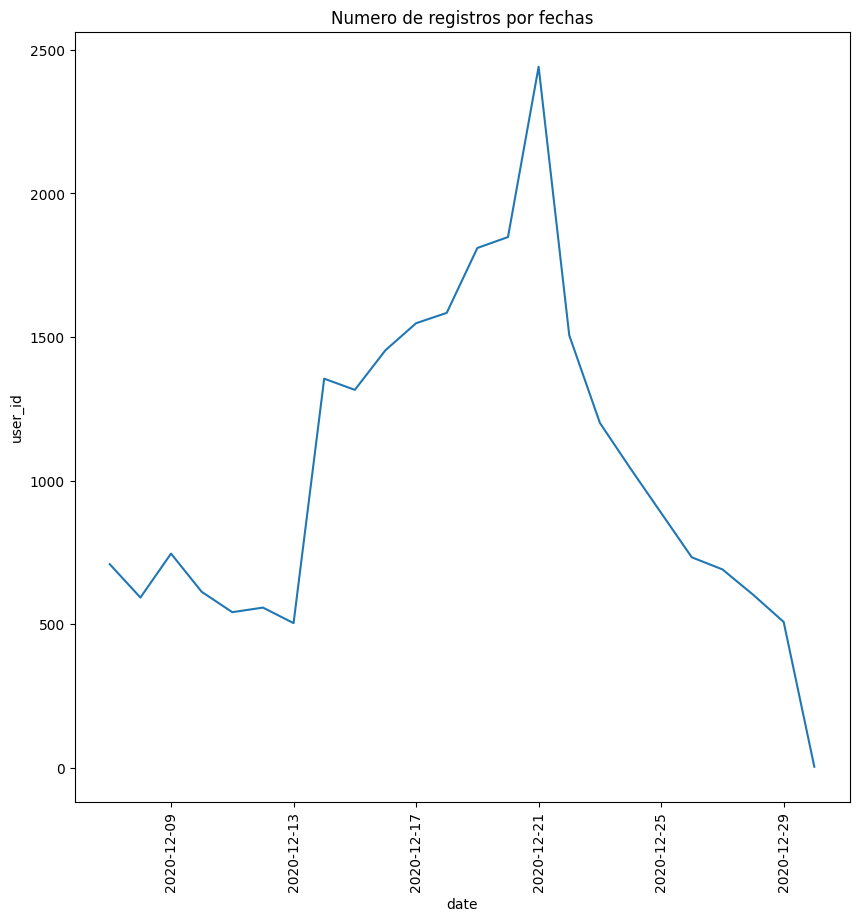

In [41]:
# Revisamos el numero de registros por fechas de nuestros datos del A/B test

funnel["date"] = funnel["event_dt"].dt.date

# Trazamos un lineplot con seaborn 

plt.figure(figsize=(10,10))
sns.lineplot(data=funnel.groupby("date")["user_id"].count().reset_index(), x="date", y="user_id")
plt.xticks(rotation=90)
plt.title("Numero de registros por fechas")

### Estudio del embudo simple de eventos

In [42]:
# Analizemos el embudo para el grupo de control A

funnel_A= funnel[funnel["group"]=="A"]  # Filtramos solo eventos del grupo de control A

# Calculamos el numero de usuarios por cada etapa del embudo en el grupo A

users_count_A = funnel_A.groupby("event_name", as_index=False).agg({"user_id": "nunique"}).sort_values(by="user_id", ascending=False)
users_count_A

,event_name,user_id
0,login,2747
2,product_page,1780
3,purchase,872
1,product_cart,824


In [43]:
# Analizamos la proporcion de usuarios que realizaron la acción al menos una vez

(funnel_A.groupby("event_name")["user_id"].nunique() / funnel_A["user_id"].nunique()).sort_values(ascending=False)


event_name
login           1.000000
product_page    0.647980
purchase        0.317437
product_cart    0.299964
Name: user_id, dtype: float64

In [44]:
# Graficamos embudo simple del grupo de control A

y_A = users_count_A["event_name"]
x_A = users_count_A["user_id"]


fig = go.Figure(go.Funnel(y=y_A, x=x_A))
fig.show()

**OBSERVACIONES: En el grupo de control A, de 2747 usuarios que se logearon 1780 llegaron a product_page y despues solo 824 llegaron a product_cart. Parece que por alguna razon los usuarios del grupo A no siguen la ruta prevista y terminan en el evento purchase sin antes pasar por product_cart, en este caso, puede que tengamos un error en los datos de lectura del tiempo en los que los usuarios realizan cada evento ya que deberian agregar el producto al carrito antes de hacer la compra esto puede ser un error de los datos tomados durante la prueba.**

In [45]:
# Analizamos el embudo simple para el grupo B

funnel_B = funnel[funnel["group"]=="B"]

users_count_B = funnel_B.groupby("event_name", as_index=False).agg({"user_id": "nunique"}).sort_values(by="user_id", ascending=False)
users_count_B 


,event_name,user_id
0,login,927
2,product_page,523
3,purchase,256
1,product_cart,255


In [46]:
funnel_B.shape

(5282, 7)

In [47]:
# Graficamos embudo simple del grupo B

y_B = users_count_B["event_name"]
x_B = users_count_B["user_id"]


fig = go.Figure(go.Funnel(y=y_B, x=x_B))
fig.show()

OBSERVACIONES: El enmbudo tiene 4 etapas:

- login
- product_page
- product_cart
- purchase

En el grupo A el 49% de los usuarios que llegaron a la product_page hicieron pedidos, en el grupo B aproximadamente el 48.9% de los usuarios que vieron la product_page hicieron pedidos o compras. Por ahora se puede notar que la conversion en esta etapa en especifico casi no cambia en comparacion a las anteriores.

### Embudos con secuencia de eventos

In [48]:
# Buscamos la hora del primer suceso de cada evento del grupo de control A

users_A = funnel_A.pivot_table(index="user_id",columns="event_name", values="event_dt", aggfunc="min")

users_A.head()

event_name,login,product_cart,product_page,purchase
user_id,,,,
0010A1C096941592,2020-12-17 21:07:27,NaT,2020-12-17 21:07:27,2020-12-17 21:07:27
00341D8401F0F665,2020-12-21 11:14:50,NaT,NaT,NaT
003DF44D7589BBD4,2020-12-17 06:17:49,2020-12-17 06:17:49,2020-12-17 06:17:49,NaT
00505E15A9D81546,2020-12-14 17:28:32,NaT,NaT,NaT
006E3E4E232CE760,2020-12-17 16:40:41,NaT,2020-12-17 16:40:42,NaT


In [49]:
# Guardamos las condiciones para cada etapa como variables

step_1A = (~ users_A["login"].isna())
step_2A = step_1A & (users_A["product_page"] > users_A["login"])
step_3A = step_2A & (users_A["product_cart"] > users_A["product_page"])
step_4A = step_3A & (users_A["purchase"] > users_A["product_cart"])

n_loginA = users_A[step_1A].shape[0]
n_product_pageA = users_A[step_2A].shape[0]
n_product_cartA = users_A[step_3A].shape[0]
n_purchaseA = users_A[step_4A].shape[0]

print(n_loginA)
print(n_product_pageA)
print(n_product_cartA)
print(n_purchaseA)

2747
1012
54
0


In [50]:
# Graficamos embudo de secuencia de eventos grupo de control A

events_A = ["login", "product_page", "product_cart", "purchase"]
n_events_A = [n_loginA, n_product_pageA, n_product_cartA, n_purchaseA]

fig_A = go.Figure(go.Funnel(y=events_A, x=n_events_A))
fig_A.show()

**OBSERVACIONES: Tomando en cuenta la secuencia de eventos, en el grupo de control A, de 1012 usuarios que llegaron a la product_page solo 54 agregaron productos al carrito pero ninguno hizo pedidos o compras. Los datos no tienes sentido, probablemente sea un problema con las fechas y horas de cada evento discrepan demasiado en comparacion al embudo anterior. En esto caso podemos decir que los usuarios no siguen la secuencia de eventos.**

In [51]:
# Buscamos la hora del primer suceso de cada evento del grupo B

users_B = funnel_B.pivot_table(index="user_id",columns="event_name", values="event_dt", aggfunc="min")

users_B.head()

event_name,login,product_cart,product_page,purchase
user_id,,,,
001064FEAAB631A1,2020-12-20 14:43:27,NaT,2020-12-20 14:43:28,NaT
005E096DBD379BCF,2020-12-21 07:20:39,NaT,NaT,2020-12-21 07:20:39
015D1E3BB893349D,2020-12-16 21:14:05,NaT,2020-12-16 21:14:06,NaT
015FF3EC72C1F4F6,2020-12-20 08:29:30,NaT,2020-12-20 08:29:31,NaT
01B0B891CA513468,2020-12-16 22:35:11,2020-12-16 22:35:11,2020-12-16 22:35:11,NaT


In [52]:
# Guardamos las condiciones para cada etapa como variables

step_1B = (~ users_B["login"].isna())
step_2B = step_1B & (users_B["product_page"] > users_B["login"])
step_3B = step_2B & (users_B["product_cart"] > users_B["product_page"])
step_4B = step_3B & (users_B["purchase"] > users_B["product_cart"])

n_loginB = users_B[step_1B].shape[0]
n_product_pageB = users_B[step_2B].shape[0]
n_product_cartB = users_B[step_3B].shape[0]
n_purchaseB = users_B[step_4B].shape[0]

print(n_loginB)
print(n_product_pageB)
print(n_product_cartB)
print(n_purchaseB)

927
284
23
1


In [53]:
# Graficamos embudo de secuencia de eventos del grupo B

events_B = ["login", "product_page", "product_cart", "purchase"]
n_events_B = [n_loginB, n_product_pageB, n_product_cartB, n_purchaseB]

fig_B = go.Figure(go.Funnel(y=events_B, x=n_events_B))
fig_B.show()

**OBSERVACIONES: Claramente no todos los usuarios toman la ruta prevista, en este caso para el grupo B siguiendo la mismo secuencia de eventos, de 284 que llegaron a la product_ page solo 23 agregaron productos al carrito y solo 1 usuario hizo compras o pedidos. Estos resultado difieron mucho del grupo A y tambien de nuestro embudo simple sin secuencia de eventos. Aqui podemos concluir que los usuarios no siguen la secuencia de eventos y por lo tanto tenemos que probar las hipotesis sin tener en cuenta la sencuencia de eventos para poder analizar las proporciones.**

In [54]:
funnel_A.head()

,user_id,event_dt,event_name,details,group,ab_test,date
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07
1,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-12-07
3,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,A,recommender_system_test,2020-12-07
5,2F46396B6766CFDB,2020-12-07 13:29:30,purchase,4.99,A,recommender_system_test,2020-12-07
6,538F954F6B3AECE4,2020-12-07 07:12:05,purchase,4.99,A,recommender_system_test,2020-12-07


In [55]:
# Calculemos la distribucion del numero de eventos por usuario en cada etapa para el grupo de control A

funnel_A["date"] = funnel_A["event_dt"].dt.date

day_counts_A = funnel_A.groupby(["date", "event_name"], as_index=False)["user_id"].count()
day_counts_A

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3464\1552543278.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,event_name,user_id
0,2020-12-07,login,154
1,2020-12-07,product_cart,35
2,2020-12-07,product_page,96
3,2020-12-07,purchase,46
4,2020-12-08,login,159
...,...,...,...
83,2020-12-28,purchase,71
84,2020-12-29,login,200
85,2020-12-29,product_cart,55
86,2020-12-29,product_page,132


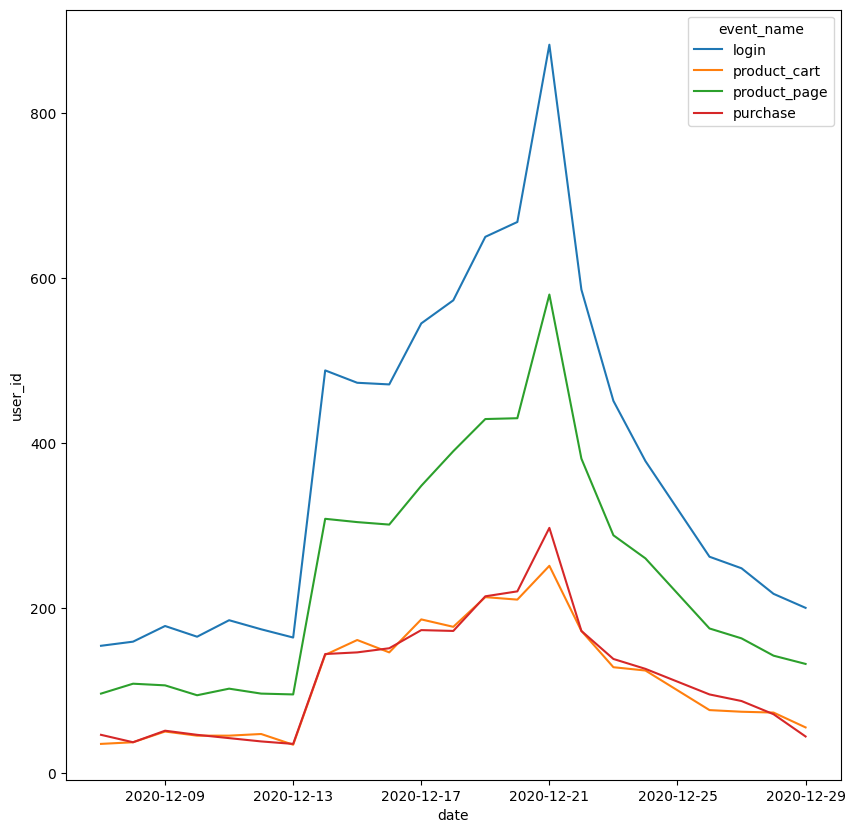

In [56]:
plt.figure(figsize=(10,10))
sns.lineplot(data=day_counts_A, x="date", y="user_id", hue="event_name")
plt.show()

In [58]:
# Distribucion del numero de eventos por usuario en cada etapa para el grupo B

funnel_B["date"] = funnel_B["event_dt"].dt.date

day_counts_B = funnel_B.groupby(["date", "event_name"], as_index=False)["user_id"].count()
day_counts_B


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3464\1137240230.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,event_name,user_id
0,2020-12-07,login,165
1,2020-12-07,product_cart,46
2,2020-12-07,product_page,108
3,2020-12-07,purchase,59
4,2020-12-08,login,119
...,...,...,...
86,2020-12-29,product_page,20
87,2020-12-29,purchase,12
88,2020-12-30,login,2
89,2020-12-30,product_cart,1


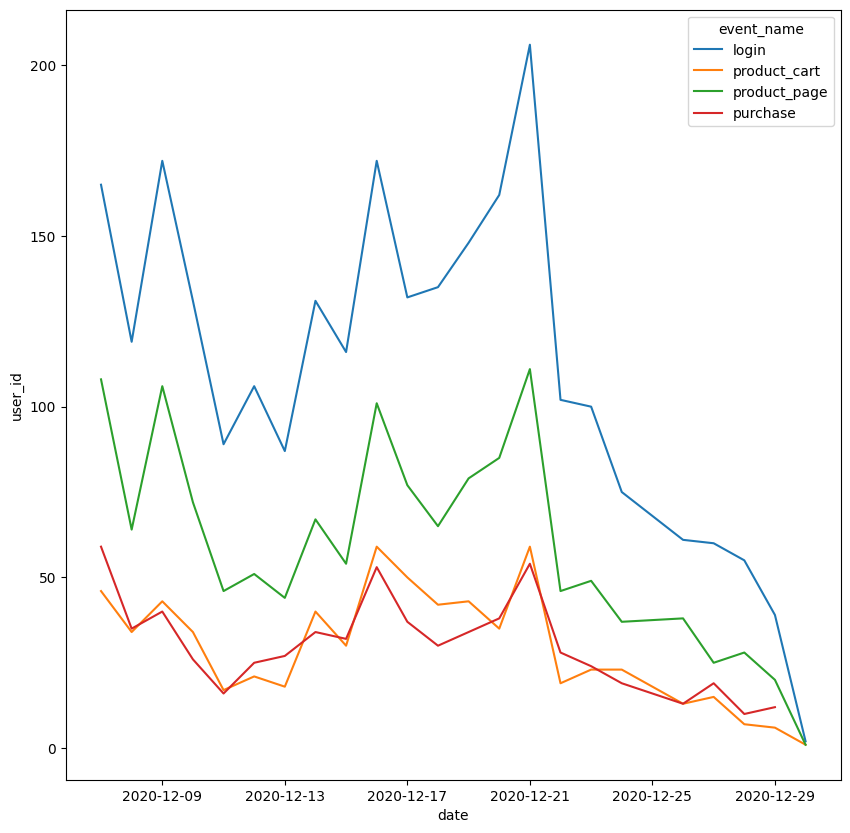

In [59]:
plt.figure(figsize=(10,10))
sns.lineplot(data=day_counts_B, x="date", y="user_id", hue="event_name")
plt.show()

**OBSERVACIONES: Las distribuciones del numero de eventos entre los dias de duracion del test muestra que hay un desbalance entre las dos ultimas etapas del embudo por alguna razon purchase y product_cart se interponen como si los usuarios tuvieran la opcion de comprar sin pasar por el carrito de compras o viceversa.**

## Z test de proporciones

Para el Z-test de proporciones tomaremos los datos del embudo sin la secuencia de eventos para poder revisar mejor las proporciones de los usuarios en cada etapa del embudo para cada grupo:

In [60]:
# Embudo de eventos 

funnel.groupby("event_name")["user_id"].nunique().sort_values(ascending=False)

event_name
login           3674
product_page    2303
purchase        1128
product_cart    1079
Name: user_id, dtype: int64

In [61]:
# Mostramos los datasets filtrados por grupo

funnel_A.head()

,user_id,event_dt,event_name,details,group,ab_test,date
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07
1,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-12-07
3,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,A,recommender_system_test,2020-12-07
5,2F46396B6766CFDB,2020-12-07 13:29:30,purchase,4.99,A,recommender_system_test,2020-12-07
6,538F954F6B3AECE4,2020-12-07 07:12:05,purchase,4.99,A,recommender_system_test,2020-12-07


In [62]:
# Mostramos los datasets filtrados por grupo

funnel_A.head()

,user_id,event_dt,event_name,details,group,ab_test,date
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07
1,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-12-07
3,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,A,recommender_system_test,2020-12-07
5,2F46396B6766CFDB,2020-12-07 13:29:30,purchase,4.99,A,recommender_system_test,2020-12-07
6,538F954F6B3AECE4,2020-12-07 07:12:05,purchase,4.99,A,recommender_system_test,2020-12-07


Hipotesis nula y alternativa:

Ho = La proporcion de la conversion de los clientes en cada etapa del embudo de eventos son iguales 

Ha = La proporcion de la conversion de los clientes en cada etapa del embudo de eventos son diferentes

In [63]:
# Creamos una funcion para nuestro z-test
# La funcion revisara las proporciones en cada etapa del embudo para ambos grupos


def z_test(step, next_step):

    event_A = funnel_A[funnel_A["event_name"]==step]["user_id"].nunique()
    event_B = funnel_B[funnel_B["event_name"]==step]["user_id"].nunique()

    next_event_A = funnel_A[funnel_A["event_name"]==next_step]["user_id"].nunique()
    next_event_B = funnel_B[funnel_B["event_name"]==next_step]["user_id"].nunique()

    alpha = 0.1 # Nivel de significacion

    next_events = np.array([next_event_A, next_event_B])
    events = np.array([event_A, event_B])

    p1 = next_events[0]/events[0]
    p2 = next_events[1]/events[1]

    p_combined = (next_events[0] + next_events[1])/(events[0] + events[1])
    difference = p1-p2

    z_value = difference/mth.sqrt(p_combined * (1 - p_combined) * (1/events[0] + 1/events[1]))

    distr = st.norm(0,1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value:', p_value)

    if (p_value < alpha):
        print('Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones.')
    else:
        print('No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes.')

In [64]:
# Analizamos las proporciones de nuestro embudo por cada grupo
# Z_test de proporciones por cada evento


print("Event: Product_page")
z_test("login","product_page")
print("Event: Purchase")
z_test("product_page","purchase")
print("Event: Product_cart")
z_test("purchase","product_cart")

Event: Product_page
p-value: 5.084368080776613e-06
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones.
Event: Purchase
p-value: 0.9870395092337259
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes.
Event: Product_cart
p-value: 0.00041675077401071015
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones.


In [65]:
# Z test de proporciones por la conversion desde "login" 
# Creamos una lista y hacemos una bucle for 


funnels = ["product_page", "product_cart", "purchase"]

for element in funnels:
    print(f"\tEvent: {element}:")
    z_test("login", element)

	Event: product_page:
p-value: 5.084368080776613e-06
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones.
	Event: product_cart:
p-value: 0.15034216422194624
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes.
	Event: purchase:
p-value: 0.018474632659979617
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones.


**OBSERVACIONES: Nuestro Z-test nos indica que las proporciones de la conversion de los usuarios no son diferentes para todas las etapas por lo tanto no la conversion mejora pero no para todos los eventos que es lo que en realidad busca el test validar, por lo tanto, podemos notar que el test no mejoro la conversion para todas las etapas del embudo de eventos.**

## Conclusiones 

- Durante el EDA se pudo validar que no habia filas completamente duplicadas, sin embargo, se encontraron valores ausentes pero estos no indicaban un problema para el analis del dataset ya que los valores ausentes eran normales para la columna especifica. Se pudo notar que los registros del A/B test tienen un lapso de tiempo de menos de 1 mes de duracion. 

- Se encontraron 3675 usuarios unicos en el A/B test, teniendo en cuenta las descripciones tecnicas se pudo notar que es un numero demasiado bajo ya por lo menos deberiamos tener un numero previsto de participantes de 6000.

- Los resultados del A/B test indican que los usuarios no siguen una ruta de eventos establecida para el embudo propuesto en la descripcion tecnica de la prueba, al parecer, la prueba no se realizo correctamente o existes errores en los datos de lectura del tiempo exacto en que los usuarios realizaron los distintos eventos en el embudo.

- Los usuarios unicos por grupo no estan distribuidos de forma equitativa por lo que el numero de eventos por usuario difiere entre los distintos eventos.

- El Z-test nos indica que las proporciones de la conversion de los usuarios no son diferentes para todas las etapas por lo tanto la conversion mejora pero no para todos los eventos que es lo que en realidad busca el test validar, por lo tanto, se pudo notar que el test no mejoro la conversion para todas las etapas del embudo de eventos.